# blockchain.info luxembourg s.a.r.i

In [2]:
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
def plot_single(S2, x, y, label):
    
    fig, axes = plt.subplots(figsize=(20,12), nrows=1, ncols=1)
    axes.plot(S2[x], S2[y],'k',label=label)
    plt.show()
    
def plot_multi(S2, labels):
    
    ys = [ x for x in S2.columns.values if x in labels ]
    
    print("ys and labels\n", ys, "\n", labels)
    
    fig, axes = plt.subplots(figsize=(20,12), nrows=1, ncols=1)
    
    for y in ys:
        axes.plot(S2['x_'], S2[y],'k',label=y)
    
    plt.show()

## Request data

Data is gathered from blockchain.info's api. The url defines what data is gathered. 

url is set to gather the 'number of transactions per day' data. Defaults to one year (unixtime), incremented by a day.

In [20]:
#n_transactions_url = 'https://api.blockchain.info/charts/n-transactions?format=json'
#n_transactions_label = 'n_transactions'
url_tuple = [('https://api.blockchain.info/charts/n-transactions?format=json', 'n_transactions'),
             ('https://api.blockchain.info/charts/market-price?format=json', 'market_price')]

S2 = pd.DataFrame()

for url, label in url_tuple:
    response = requests.get(url=url)
    data = response.json()
    x = [ d['x'] for d in data['values'] ]
    y = [ d['y'] for d in data['values'] ]
    if 'x_' in S2.columns.values:
        url_df = pd.DataFrame({label+'_x_': x, label: y})
    else:
        url_df = pd.DataFrame({'x_': x, label: y})
    S2 = pd.concat([S2, url_df], axis=1)

print(S2.head())

   n_transactions          x_  market_price  market_price_x_
0        320713.0  1490140800   1028.726862       1490140800
1        287871.0  1490227200   1038.789000       1490227200
2        289521.0  1490313600    941.919714       1490313600
3        242975.0  1490400000    959.340086       1490400000
4        221915.0  1490486400    956.786313       1490486400


In [10]:
S2.shape

(365, 2)

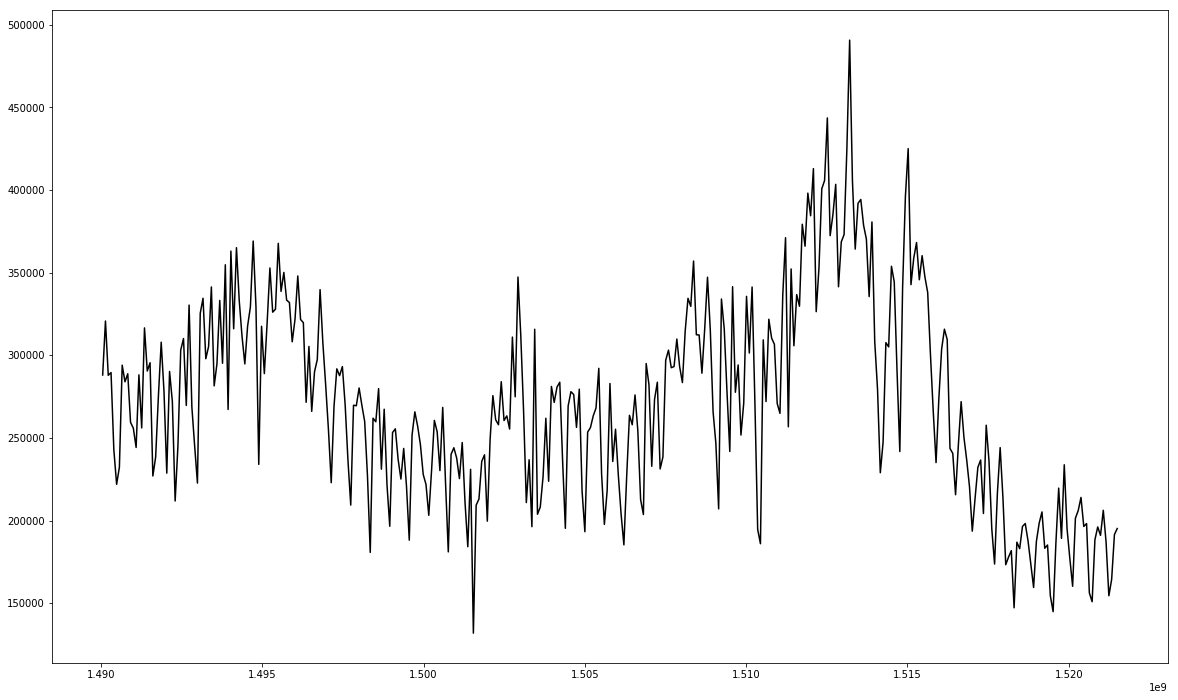

In [8]:
plot_single(S2, 'x', 'y', 'insert_label')

ys and labels
 ['n_transactions', 'market_price'] 
 ['n_transactions', 'market_price']


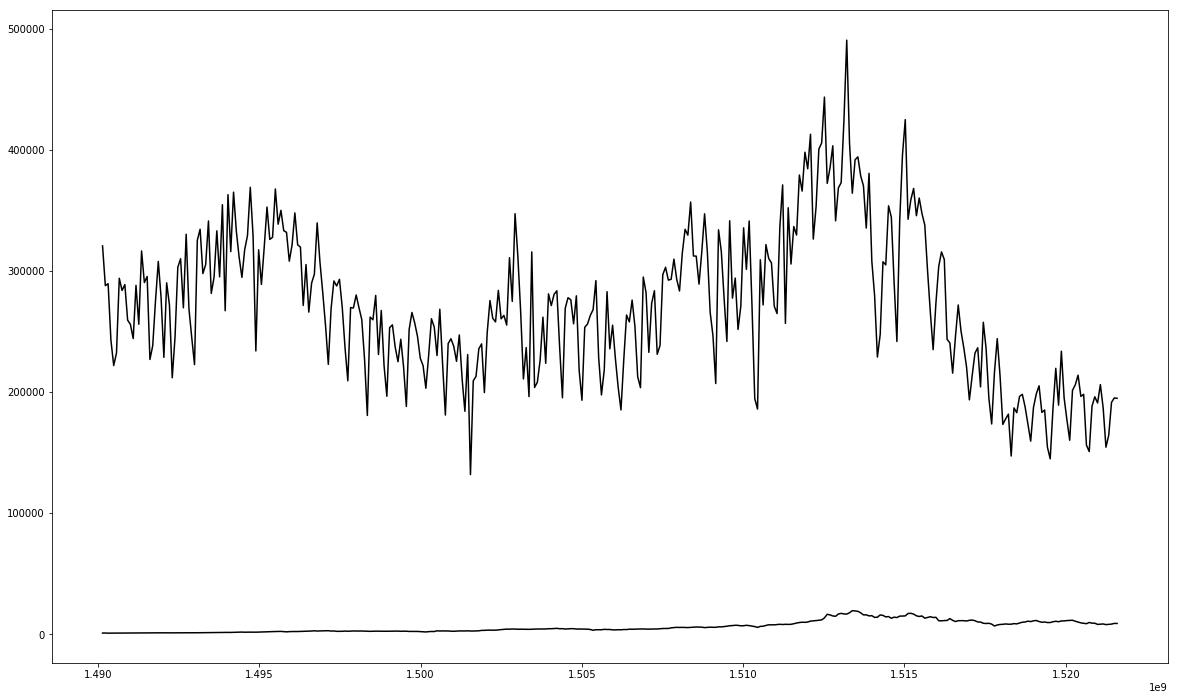

In [25]:
selected_labels = [ x[1] for x in url_tuple ]
plot_multi(S2, selected_labels)